In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import json
import re 
import time
from pandas.io.json import json_normalize
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

In [2]:
o1 = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/OBJECTIVE_UNIFIED_ONE_ENCODED.csv")
o2 = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/OBJECTIVE_TWO_game_objectives.csv")

In [4]:
o1 = o1.drop(["p1", "p2", "p3", "p4", "p5", "sum"], axis = 1)
o1

,winStat,team,gameId,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,...,Xin Zhao,Yasuo,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,False,100,4247263043,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,True,100,4247155821,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,False,100,4243963257,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,100,4241678498,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,True,100,4241538868,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185697,True,200,4039738326,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
185698,False,200,4170286047,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
185699,False,200,4136207327,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185700,False,200,4130964458,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
o2

,gameId,teamId,win,firstBlood,firstTower,firstBaron,firstDragon,firstRiftHerald,dragonKills,riftHeraldKills
0,4247263043,200,True,False,True,False,True,True,3,2
1,4247155821,100,True,False,False,False,True,True,2,2
2,4243963257,200,True,True,True,False,True,True,2,2
3,4241678498,200,True,True,True,False,False,True,3,1
4,4241538868,100,True,True,True,True,True,True,2,2
...,...,...,...,...,...,...,...,...,...,...
185841,4039738326,100,False,False,False,False,False,False,0,0
185842,4170286047,200,False,False,True,False,True,False,1,0
185843,4136207327,200,False,False,False,False,False,False,0,0
185844,4130964458,200,False,False,True,False,True,True,2,2


In [6]:
o1win = o1[o1.winStat == True]
o1los = o1[o1.winStat == False]

In [8]:
encoder = {"Win" : True, "Fail" : False}
o2 = o2.replace(encoder)

o2win = o2[o2.win == True]
o2los = o2[o2.win == False]

In [23]:
winner = pd.merge(o2win, o1win, on = "gameId")
winner = winner.drop(["winStat", "team"], axis = 1)
winner

,gameId,teamId,win,firstBlood,firstTower,firstBaron,firstDragon,firstRiftHerald,dragonKills,riftHeraldKills,...,Xin Zhao,Yasuo,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,4247263043,200,True,False,True,False,True,True,3,2,...,0,0,0,0,0,0,0,0,0,0
1,4247155821,100,True,False,False,False,True,True,2,2,...,0,0,0,1,0,0,0,0,0,0
2,4243963257,200,True,True,True,False,True,True,2,2,...,0,0,0,0,0,0,0,0,0,0
3,4241678498,200,True,True,True,False,False,True,3,1,...,0,1,0,0,1,0,0,0,0,0
4,4241538868,100,True,True,True,True,True,True,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93062,4039738326,200,True,True,True,False,True,True,1,1,...,0,0,0,0,1,1,0,0,0,0
93063,4170286047,100,True,True,False,True,False,True,2,2,...,0,0,0,0,0,0,0,0,0,0
93064,4136207327,100,True,True,True,False,True,True,1,1,...,0,0,0,0,0,0,0,0,0,0
93065,4130964458,100,True,True,False,True,False,False,2,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
loser = pd.merge(o2los, o1los, on = "gameId")
loser = loser.drop(["winStat", "team"], axis = 1)
loser

,gameId,teamId,win,firstBlood,firstTower,firstBaron,firstDragon,firstRiftHerald,dragonKills,riftHeraldKills,...,Xin Zhao,Yasuo,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,4247263043,100,False,True,False,False,False,False,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4247155821,200,False,True,True,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4243963257,100,False,False,False,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4241678498,100,False,False,False,True,True,False,1,0,...,0,0,0,0,0,0,0,0,1,0
4,4241538868,200,False,False,False,False,False,False,3,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93062,4039738326,100,False,False,False,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
93063,4170286047,200,False,False,True,False,True,False,1,0,...,0,0,0,0,0,0,0,1,0,0
93064,4136207327,200,False,False,False,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
93065,4130964458,200,False,False,True,False,True,True,2,2,...,0,1,0,0,0,0,0,0,0,0


In [26]:
winSort = winner.sort_values(by = ["gameId"])
losSort = loser.sort_values(by = ["gameId"])

In [30]:
gameIdCompare = np.where(winSort["gameId"] == losSort["gameId"], True, False)
unique, counts = np.unique(gameIdCompare, return_counts = True)
dict(zip(unique, counts))

{True: 93067}

In [31]:
teamCompare = np.where(winSort["teamId"] == losSort["teamId"], True, False)
unique, counts = np.unique(teamCompare, return_counts = True)
dict(zip(unique, counts))

{False: 93067}

In [32]:
winCompare = np.where(winSort["win"] == losSort["win"], True, False)
unique, counts = np.unique(winCompare, return_counts = True)
dict(zip(unique, counts))

{False: 93067}

In [38]:
union = pd.concat([winner, loser])
uni = union.reset_index()
uni = uni.drop(["index"], axis = 1)
uni

,gameId,teamId,win,firstBlood,firstTower,firstBaron,firstDragon,firstRiftHerald,dragonKills,riftHeraldKills,...,Xin Zhao,Yasuo,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,4247263043,200,True,False,True,False,True,True,3,2,...,0,0,0,0,0,0,0,0,0,0
1,4247155821,100,True,False,False,False,True,True,2,2,...,0,0,0,1,0,0,0,0,0,0
2,4243963257,200,True,True,True,False,True,True,2,2,...,0,0,0,0,0,0,0,0,0,0
3,4241678498,200,True,True,True,False,False,True,3,1,...,0,1,0,0,1,0,0,0,0,0
4,4241538868,100,True,True,True,True,True,True,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186129,4039738326,100,False,False,False,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
186130,4170286047,200,False,False,True,False,True,False,1,0,...,0,0,0,0,0,0,0,1,0,0
186131,4136207327,200,False,False,False,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
186132,4130964458,200,False,False,True,False,True,True,2,2,...,0,1,0,0,0,0,0,0,0,0


In [41]:
label = uni["win"]
feat = uni.drop(["gameId", "teamId", "win"], axis = 1)

ft_train, ft_test, lb_train, lb_test = train_test_split(feat, label, test_size = 0.5, random_state = 42)

In [47]:
featNames = ["firstBlood", "firstTower", "firstBaron", "firstDragon",
             "firstRiftHerald", "dragonKills", "riftHeraldKills"]

champDic = open("C:/Users/Aaron/Desktop/loldfs/OBJECTIVE_ONE_champion_ID.pkl", "rb")
champId = pickle.load(champDic)

nameList = list(champId.values())
newChamps = {"Lillia", "Yone", "Samira", "Seraphine", "Rell", "Viego", "Gwen", "Akshan"}
namel = [ele for ele in nameList if ele not in newChamps]

for i in namel:
    featNames.append(i)

In [40]:
#
#
#
#
#

In [49]:
#DECISION TREE CLASSIFIER

start = time.time()

dt = tree.DecisionTreeClassifier()
dt.fit(ft_train, lb_train)
dtPred = dt.predict(ft_test)

end = time.time()

DTA = metrics.accuracy_score(lb_test, dtPred)
print(DTA)
print(f"Training time is {end - start} seconds")

0.752683550560349
Training time is 5.971707582473755 seconds


In [40]:
#
#
#
#
#

In [50]:
#NAIVE BAYES

start = time.time()

nb = GaussianNB()
nb.fit(ft_train, lb_train.values.ravel())
nbPred = nb.predict(ft_test)

end = time.time()

NBA = metrics.accuracy_score(lb_test, nbPred)
print(NBA)
print(f"Training time is {end - start} seconds")

0.7095318426509933
Training time is 1.6475965976715088 seconds


In [40]:
#
#
#
#
#

In [44]:
#RANDOM FOREST CLASSIFIER

start = time.time()

rf = RandomForestClassifier()
rf.fit(ft_train, lb_train.values.ravel())
rfPred = rf.predict(ft_test)

end = time.time()

RFA = metrics.accuracy_score(lb_test, rfPred)
print(RFA)
print(f"Training time is {end - start} seconds")

0.8162721480223925
Training time is 34.89872694015503 seconds


Text(0.5, 1.0, 'Feature Importance - Random Forest')

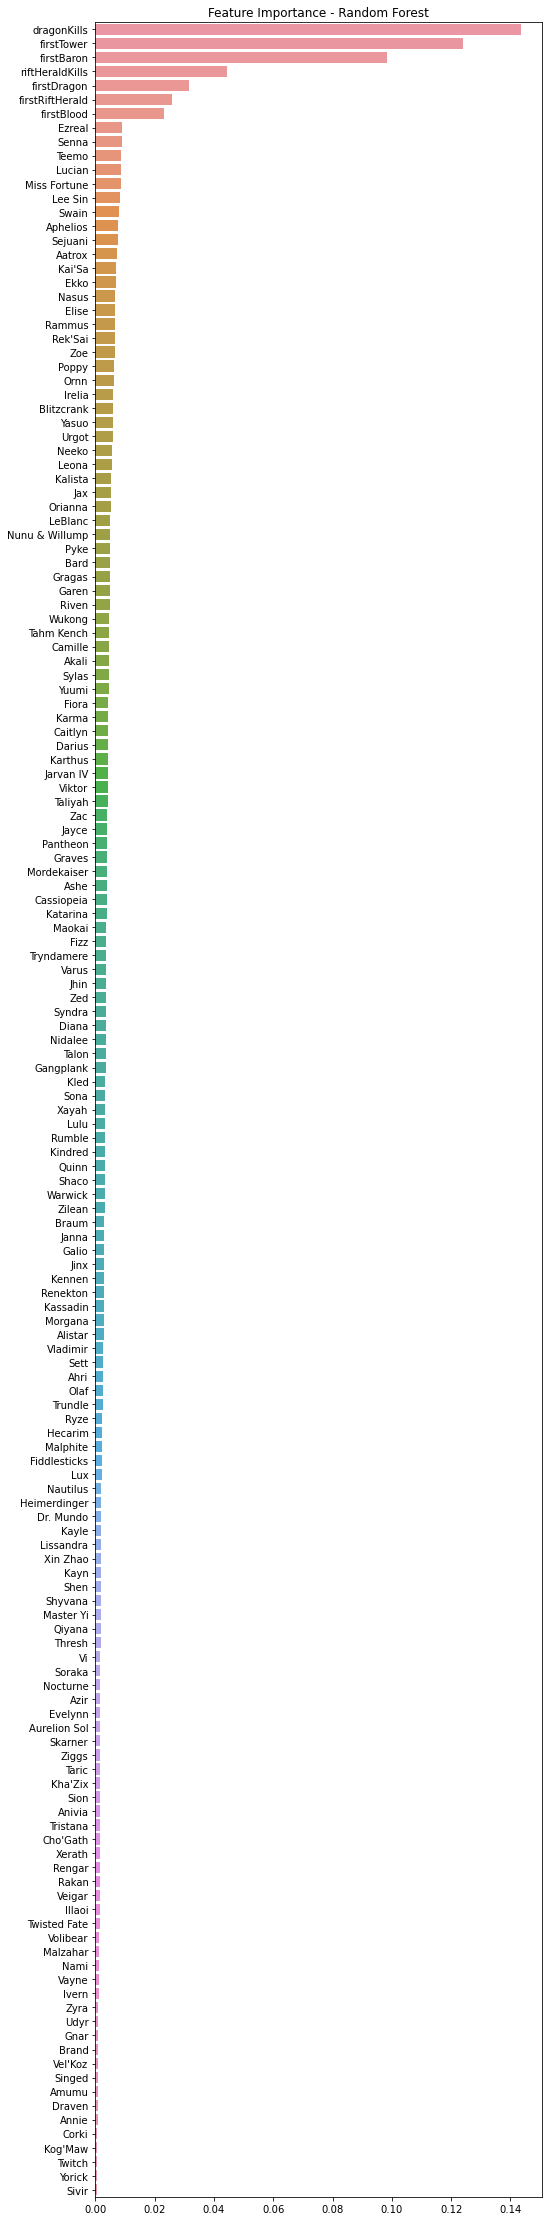

In [48]:
#feature importance
feature_score = pd.Series(rf.feature_importances_, index = featNames).sort_values(ascending = False)

fig_dims = (8, 40)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(x = feature_score, y = feature_score.index, ax = ax)
ax.set_title("Feature Importance - Random Forest")

In [51]:
#
#
#
#
#

In [52]:
#LOGISTIC REGRESSION

start = time.time()

logReg = LogisticRegression(solver = "liblinear")
logReg.fit(ft_train, lb_train.values.ravel())
lrPred = logReg.predict(ft_test)

end = time.time()

LRA = metrics.accuracy_score(lb_test, rfPred)
print(LRA)
print(f"Training time is {end - start} seconds")

0.8162721480223925
Training time is 1.5765998363494873 seconds


Text(0.5, 257.44, 'Predicted label')

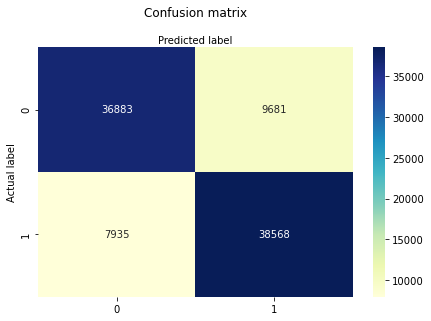

In [54]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(lb_test, lrPred)
cnf_matrix

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
#
#
#
#
#

In [55]:
#EXTREME GRADIENT BOOST
start = time.time()

xgbc = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss')
xgbc.fit(ft_train, lb_train.values.ravel())
xgbcPred = xgbc.predict(ft_test)

end = time.time()

XGBA = metrics.accuracy_score(lb_test, xgbcPred)
print(XGBA)
print(f"Training time is {end - start} seconds")

0.8179698496781889
Training time is 13.681553363800049 seconds


Text(0.5, 1.0, 'Feature Importance - Extreme Gradient Boost')

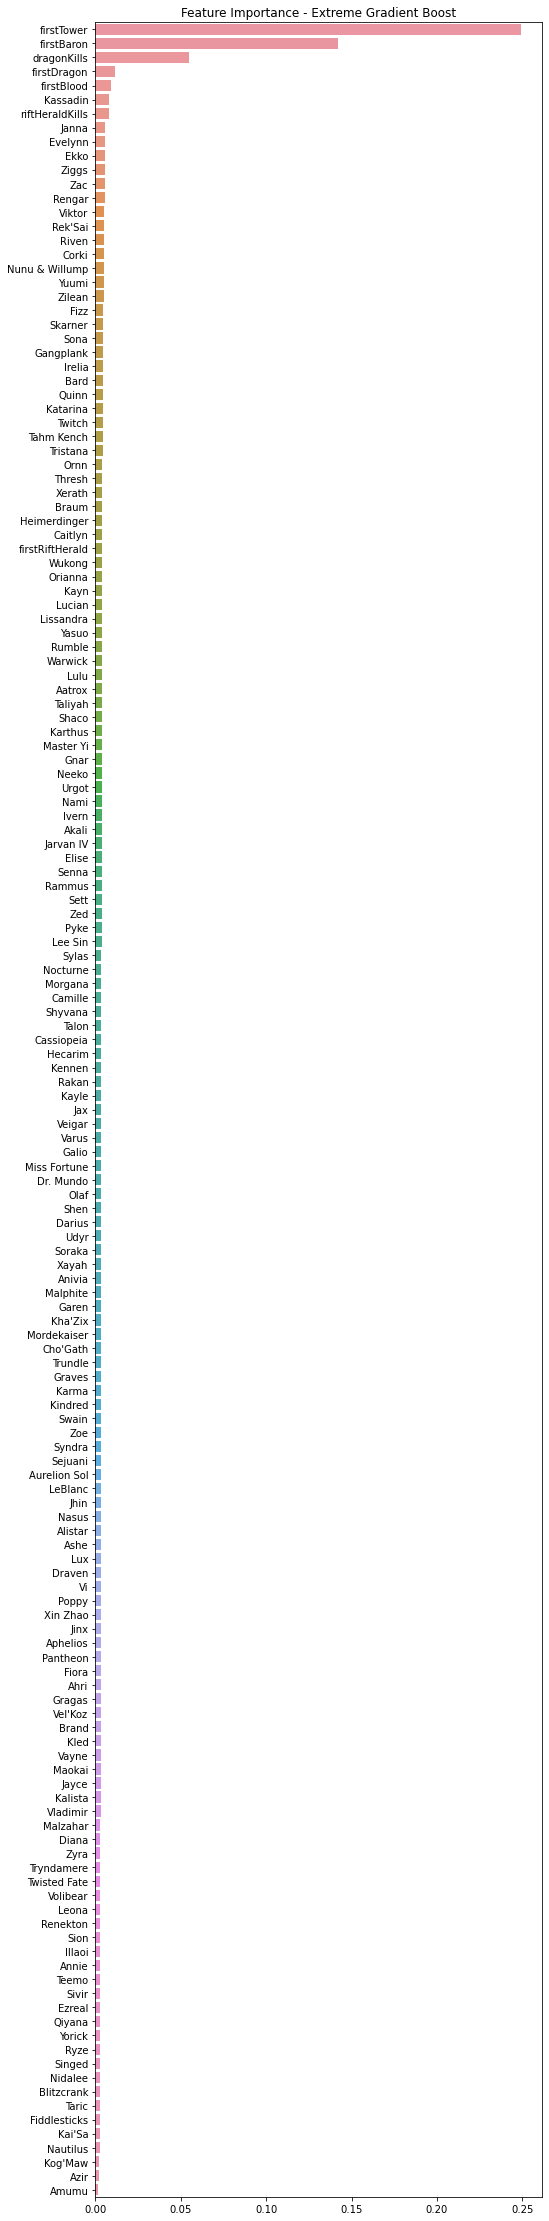

In [58]:
#XGB feature importance
feature_score = pd.Series(xgbc.feature_importances_, index = featNames).sort_values(ascending = False)

fig_dims = (8, 40)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(x = feature_score, y = feature_score.index, ax = ax)
ax.set_title("Feature Importance - Extreme Gradient Boost")

In [57]:
#
#
#
#
#

In [59]:
#ACCURACY OVERVIEW
DT = "{:.2f}".format(DTA*100)+"%"
NB = "{:.2f}".format(NBA*100)+"%"
RF = "{:.2f}".format(RFA*100)+"%"
LR = "{:.2f}".format(LRA*100)+"%"
XGB = "{:.2f}".format(XGBA*100)+"%"
print(DT, NB, RF, LR, XGB)

75.27% 70.95% 81.63% 81.63% 81.80%


In [60]:
#
#
#
#
#

Decision Tree: ROC AUC = 0.753
Naive Bayes: ROC AUC = 0.776
Random Forest: ROC AUC = 0.884
Logistic Regression: ROC AUC = 0.881
Extreme Gradient Boost: ROC AUC = 0.890


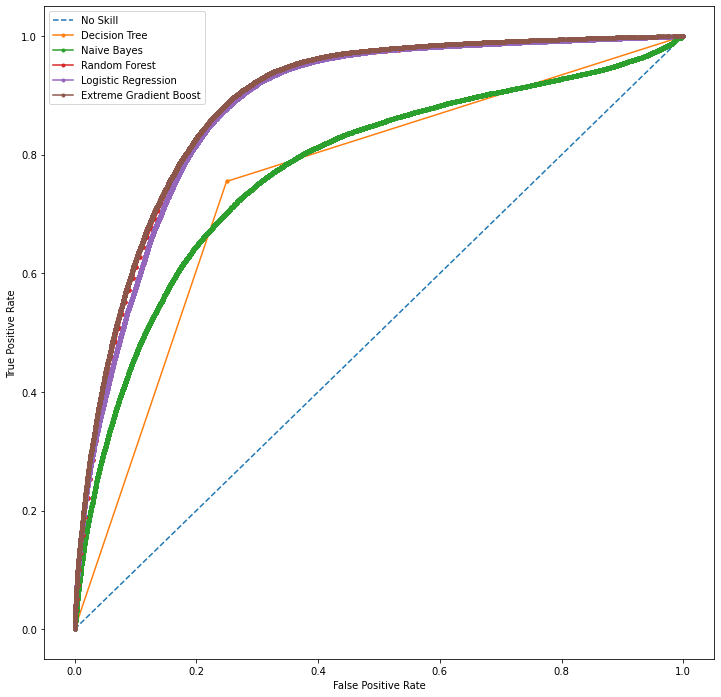

In [61]:
#ROC CURVES PLOT

#plot the no skill line
nsProbs = [0 for _ in range(len(lb_test))]
nsAuc = roc_auc_score(lb_test, nsProbs)
ns_fpr, ns_tpr, _ = roc_curve(lb_test, nsProbs)

#Decision Tree
dtProb = dt.predict_proba(ft_test)
dtProb = dtProb[:, 1]
dtAuc = roc_auc_score(lb_test, dtProb)
print("Decision Tree: ROC AUC = %.3f" % (dtAuc))
dt_fpr, dt_tpr, _ = roc_curve(lb_test, dtProb)

#Naive Bayes
nbProb = nb.predict_proba(ft_test)
nbProb = nbProb[:, 1]
nbAuc = roc_auc_score(lb_test, nbProb)
print("Naive Bayes: ROC AUC = %.3f" % (nbAuc))
nb_fpr, nb_tpr, _ = roc_curve(lb_test, nbProb)

#Random Forest
rfProb = rf.predict_proba(ft_test)
rfProb = rfProb[:, 1]
rfAuc = roc_auc_score(lb_test, rfProb)
print("Random Forest: ROC AUC = %.3f" % (rfAuc))
rf_fpr, rf_tpr, _ = roc_curve(lb_test, rfProb)

#Logistic Regression
lrProb = logReg.predict_proba(ft_test)
lrProb = lrProb[:, 1]
lrAuc = roc_auc_score(lb_test, lrProb)
print("Logistic Regression: ROC AUC = %.3f" % (lrAuc))
lr_fpr, lr_tpr, _ = roc_curve(lb_test, lrProb)

#Extreme Gradient Boost
xgbcProb = xgbc.predict_proba(ft_test)
xgbcProb = xgbcProb[:, 1]
xgbcAuc = roc_auc_score(lb_test, xgbcProb)
print("Extreme Gradient Boost: ROC AUC = %.3f" % (xgbcAuc))
xgbc_fpr, xgbc_tpr, _ = roc_curve(lb_test, xgbcProb)

plt.figure(figsize = (12, 12))

plt.plot(ns_fpr, ns_tpr, linestyle = "--", label = 'No Skill')
plt.plot(dt_fpr, dt_tpr, marker = ".", label = "Decision Tree")
plt.plot(nb_fpr, nb_tpr, marker = ".", label = "Naive Bayes")
plt.plot(rf_fpr, rf_tpr, marker = ".", label = "Random Forest")
plt.plot(lr_fpr, lr_tpr, marker = ".", label = "Logistic Regression")
plt.plot(xgbc_fpr, xgbc_tpr, marker = ".", label = "Extreme Gradient Boost")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()